In [35]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

tickers = [
    "TTE.PA",      # TotalEnergies
    "BN.PA",       # Danone
    "SAN.PA",      # Sanofi
    "BNP.PA",      # BNP Paribas
    "ENGI.PA",     # Engie
    "ORA.PA",      # Orange
    "MC.PA",       # LVMH Moet Hennessy
    "CS.PA",       # AXA
    "OR.PA",       # L'Oréal
    "GLE.PA",      # Société Générale
    "AI.PA",       # Air Liquide
    "VIV.PA",      # Vivendi
    "DG.PA",       # Vinci
    "MT.AS",       # ArcelorMittal
    "RI.PA",       # Pernod Ricard
    "SGO.PA",      # Saint-Gobain
    "SU.PA",       # Schneider Electric
    "CA.PA",       # Carrefour SA
    "VIE.PA",      # Veolia Environnement
    "ALO.PA"       # Alstom
]

data = yf.download(tickers, start="2009-01-01", end="2010-01-01", interval="1d")['Adj Close']
data = data[tickers]  # Reorder the columns to match the input ticker order
data_ffilled = data.fillna(method='ffill').fillna(method='bfill')
daily_returns = data_ffilled.pct_change()

portfolio_returns = daily_returns.mean(axis=1)

[*********************100%%**********************]  20 of 20 completed


## Optimisation de Portefeuille : Maximisation du Ratio de Sharpe

Dans cette analyse, nous nous plaçons en **janvier 2009** afin d'optimiser un portefeuille d'actifs en maximisant le **ratio de Sharpe**. L'objectif est d'identifier les pondérations optimales à attribuer aux titres sélectionnés.

Contrairement à l'hypothèse d'équipondération précédemment utilisée, ce projet vise à déterminer les **poids optimaux** de chaque titre pour maximiser le ratio de Sharpe sur la période **2009 - 2010**. Les poids optimaux seront ensuite utilisée par l'investisseur passif pour constituer son portefeuille en janvier 2010 (et détention du portefeuille sans rebalancement jusqu'à janvier 2024). 


In [37]:
expected_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252
num_assets = len(tickers)

In [39]:
# Simulation permettant de backtester 10000 portefeuilles
num_portfolios = 10000

# Stocker les résultats : rendement, volatilité, ratio de Sharpe et pondérations
results = np.zeros((4, num_portfolios))
all_weights = np.zeros((num_portfolios, num_assets))  # Stocker les pondérations de chaque portefeuille

for i in range(num_portfolios):
  
    weights = np.random.random(num_assets)  # Générer des pondérations aléatoires
    weights /= np.sum(weights)  # La somme des pondérations doit être égale à 1
    
    # Calcul du rendement du portefeuille
    portfolio_return = np.sum(weights * expected_returns)
    
    # Calcul de la volatilité (écart type) du portefeuille
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Calcul du ratio de Sharpe (rendement/volatilité)
    sharpe_ratio = portfolio_return / portfolio_volatility
    
    # Stocker les résultats
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio
    
    # Stocker les pondérations du portefeuille
    all_weights[i, :] = weights

In [41]:
# Organize data into DataFrame
portfolio_stats = pd.DataFrame({
    'Expected Return': results[0],
    'Volatility': results[1],
    'Sharpe Ratio': results[2],
})

# Organizing the portfolio weights
portfolio_weights = pd.DataFrame(all_weights, columns=tickers)

# Now export these to Excel
excel_file_path = 'portfolio_simulation_C.xlsx'
with pd.ExcelWriter(excel_file_path) as writer:
    data_ffilled.to_excel(writer, sheet_name='Adj Close Prices')
    daily_returns.to_excel(writer, sheet_name='Daily Returns')
    portfolio_stats.to_excel(writer, sheet_name='Portfolio Stats')
    portfolio_weights.to_excel(writer, sheet_name='Portfolio Weights')

excel_file_path

'portfolio_simulation_C.xlsx'

In [43]:
# Trouver l'indice du portefeuille avec le ratio de Sharpe maximal
max_sharpe_idx = np.argmax(results[2])

# Récupérer les statistiques du portefeuille à ratio de Sharpe maximal
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

# Afficher les résultats
print(f"Portefeuille Optimal (Maximisation du Ratio de Sharpe):")
print(f"Rendement Espéré: {max_sharpe_return:.2f}")
print(f"Volatilité: {max_sharpe_volatility:.2f}")
print(f"Ratio de Sharpe: {max_sharpe_ratio:.2f}")

Portefeuille Optimal (Maximisation du Ratio de Sharpe):
Rendement Espéré: 0.35
Volatilité: 0.27
Ratio de Sharpe: 1.28


In [45]:
# Trouver l'indice du portefeuille avec le ratio de Sharpe maximal
max_sharpe_idx = np.argmax(results[2])

# Récupérer les pondérations du portefeuille avec le meilleur ratio de Sharpe
optimal_weights = all_weights[max_sharpe_idx, :]

# Afficher les pondérations des titres dans le portefeuille optimal
print(f"Pondérations du portefeuille optimal : {optimal_weights}")
print(f"Titres correspondants : {tickers}")

Pondérations du portefeuille optimal : [0.00234364 0.06000683 0.1032081  0.08941065 0.01821097 0.01103328
 0.1022759  0.00814027 0.07159243 0.0223402  0.05308766 0.06206077
 0.00630157 0.07064095 0.05194705 0.0033591  0.05041772 0.08736228
 0.03521704 0.09104357]
Titres correspondants : ['TTE.PA', 'BN.PA', 'SAN.PA', 'BNP.PA', 'ENGI.PA', 'ORA.PA', 'MC.PA', 'CS.PA', 'OR.PA', 'GLE.PA', 'AI.PA', 'VIV.PA', 'DG.PA', 'MT.AS', 'RI.PA', 'SGO.PA', 'SU.PA', 'CA.PA', 'VIE.PA', 'ALO.PA']


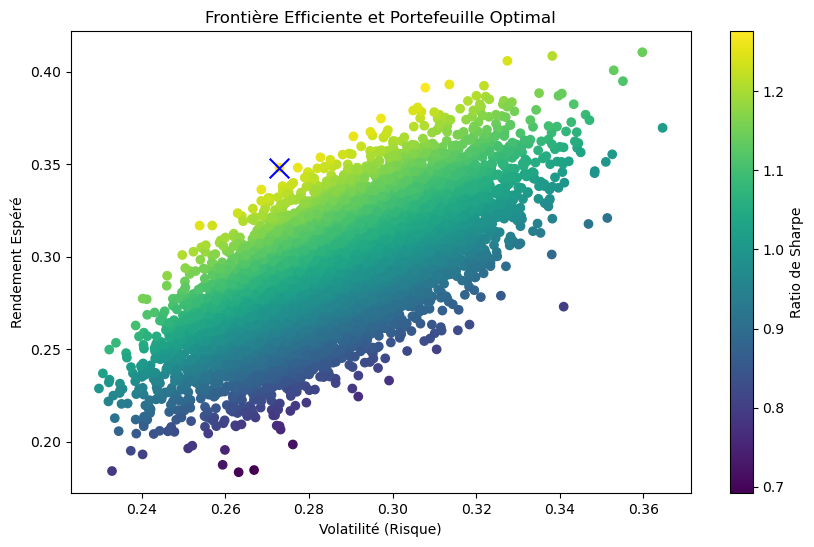

     Ticker     Poids
0    TTE.PA  0.002344
1     BN.PA  0.060007
2    SAN.PA  0.103208
3    BNP.PA  0.089411
4   ENGI.PA  0.018211
5    ORA.PA  0.011033
6     MC.PA  0.102276
7     CS.PA  0.008140
8     OR.PA  0.071592
9    GLE.PA  0.022340
10    AI.PA  0.053088
11   VIV.PA  0.062061
12    DG.PA  0.006302
13    MT.AS  0.070641
14    RI.PA  0.051947
15   SGO.PA  0.003359
16    SU.PA  0.050418
17    CA.PA  0.087362
18   VIE.PA  0.035217
19   ALO.PA  0.091044


In [47]:
# Extraire les rendements, les volatilités, et les ratios de Sharpe
portfolio_returns = results[0]
portfolio_volatility = results[1]
sharpe_ratios = results[2]

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Ratio de Sharpe')
# Mettre en évidence le portefeuille avec le meilleur ratio de Sharpe
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='blue', marker='x', s=200)
plt.title('Frontière Efficiente et Portefeuille Optimal')
plt.xlabel('Volatilité (Risque)')
plt.ylabel('Rendement Espéré')
plt.show()


optimal_portfolio = pd.DataFrame({
    'Ticker': tickers,
    'Poids': optimal_weights
})

print(optimal_portfolio)

Le portefeuille permettant de maximiser le ratio de Sharpe est représenté par la croix bleu (X) sur le graphique précédent. Ce portefeuille est composé des titres précédents (avec leurs poids respectifs). La stratégie que l'on développe dans ce projet consiste à utiliser cette allocation de manière statitique (une fois la simulation réalisée de 2009 à 2010, on constitue le portefeuille en 2010 sans avoir à toucher aux lignes années après années). 

**Remarque :** Il est tout à fait possible, pour ceux qui le souhaite, de réaliser une optimisation à fréquence trimestrielle/annuelle de manière à rebalancer le poids du portefeuille tout au long de sa détention. 

In [49]:
# Chargeons le portefeuille optimale avec les poids respectifs 

tickers = [
    "TTE.PA",      # TotalEnergies
    "BN.PA",       # Danone
    "SAN.PA",      # Sanofi
    "BNP.PA",      # BNP Paribas
    "ENGI.PA",     # Engie
    "ORA.PA",      # Orange
    "MC.PA",       # LVMH Moet Hennessy
    "CS.PA",       # AXA
    "OR.PA",       # L'Oréal
    "GLE.PA",      # Société Générale
    "AI.PA",       # Air Liquide
    "VIV.PA",      # Vivendi
    "DG.PA",       # Vinci
    "MT.AS",       # ArcelorMittal
    "RI.PA",       # Pernod Ricard
    "SGO.PA",      # Saint-Gobain
    "SU.PA",       # Schneider Electric
    "CA.PA",       # Carrefour SA
    "VIE.PA",      # Veolia Environnement
    "ALO.PA"       # Alstom
]
optimal_weights = np.array([
    0.002344,  # TotalEnergies
    0.060007,  # Danone
    0.103208,  # Sanofi
    0.089411,  # BNP Paribas
    0.018211,  # Engie
    0.011033,  # Orange
    0.102276,  # LVMH Moet Hennessy
    0.008140,  # AXA
    0.071592,  # L'Oréal
    0.022340,  # Société Générale
    0.053088,  # Air Liquide
    0.062061,  # Vivendi
    0.006302,  # Vinci
    0.070641,  # ArcelorMittal
    0.051947,  # Pernod Ricard
    0.003359,  # Saint-Gobain
    0.050418,  # Schneider Electric
    0.087362,  # Carrefour SA
    0.035217,  # Veolia Environnement
    0.091044   # Alstom
])          #poids w* qui sont a renseignées par l'optimisation précédentes 

data = yf.download(tickers, start="2010-01-01", end="2024-01-01")['Adj Close']
cac40_data = yf.download("^FCHI", start="2010-01-01", end="2024-01-01")['Adj Close']

[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


In [51]:
daily_returns = data.pct_change().dropna()
cac40_returns = cac40_data.pct_change().dropna()
portfolio_returns = daily_returns.dot(optimal_weights) # calcul des perf journalières
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() #perf cumulées
cac40_cumulative_returns = (1 + cac40_returns).cumprod()

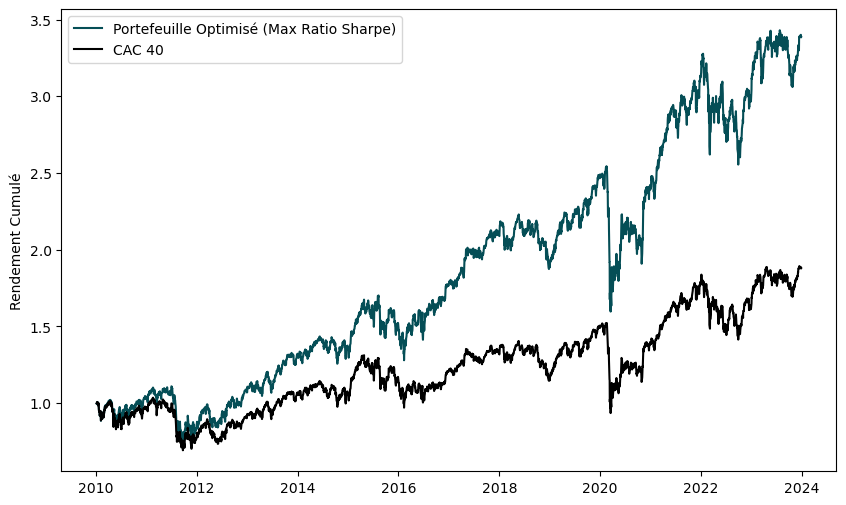

Portefeuille Optimisé :
  - Rendement Total: 238.65%
  - Rendement Annualisé: 10.70%
  - Volatilité Annualisée: 20.56%
  - Ratio de Sharpe: 0.52

CAC 40 :
  - Rendement Total: 87.92%
  - Rendement Annualisé: 6.47%
  - Volatilité Annualisée: 20.10%
  - Ratio de Sharpe: 0.32


In [53]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns, label='Portefeuille Optimisé (Max Ratio Sharpe)', color="#054E56")
plt.plot(cac40_cumulative_returns, label='CAC 40', color='black')
plt.title('')
plt.xlabel('')
plt.ylabel('Rendement Cumulé')
plt.legend()
plt.grid(False)
plt.show()

# Statistiques de performance du portefeuille
total_return_portfolio = portfolio_cumulative_returns[-1] - 1
annualized_return_portfolio = portfolio_returns.mean() * 252
annualized_volatility_portfolio = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio_portfolio = annualized_return_portfolio / annualized_volatility_portfolio

# Statistiques de performance du benchmark
total_return_cac40 = cac40_cumulative_returns[-1] - 1
annualized_return_cac40 = cac40_returns.mean() * 252
annualized_volatility_cac40 = cac40_returns.std() * np.sqrt(252)
sharpe_ratio_cac40 = annualized_return_cac40 / annualized_volatility_cac40

print(f"Portefeuille Optimisé :")
print(f"  - Rendement Total: {total_return_portfolio:.2%}")
print(f"  - Rendement Annualisé: {annualized_return_portfolio:.2%}")
print(f"  - Volatilité Annualisée: {annualized_volatility_portfolio:.2%}")
print(f"  - Ratio de Sharpe: {sharpe_ratio_portfolio:.2f}")
print(f"\nCAC 40 :")
print(f"  - Rendement Total: {total_return_cac40:.2%}")
print(f"  - Rendement Annualisé: {annualized_return_cac40:.2%}")
print(f"  - Volatilité Annualisée: {annualized_volatility_cac40:.2%}")
print(f"  - Ratio de Sharpe: {sharpe_ratio_cac40:.2f}")

In [58]:

performance_stats = pd.DataFrame({
    'Statistique': ['Rendement Total', 'Rendement Annualisé', 'Volatilité Annualisée', 'Ratio de Sharpe'],
    'Portefeuille Optimisé': [
        portfolio_cumulative_returns[-1] - 1,
        portfolio_returns.mean() * 252,
        portfolio_returns.std() * np.sqrt(252),
        (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
    ],
    'CAC 40': [
        cac40_cumulative_returns[-1] - 1,
        cac40_returns.mean() * 252,
        cac40_returns.std() * np.sqrt(252),
        (cac40_returns.mean() * 252) / (cac40_returns.std() * np.sqrt(252))
    ]
})

# Export data to Excel
excel_file_path = 'portfolio_performance_data_C.xlsx'
with pd.ExcelWriter(excel_file_path) as writer:
    data.to_excel(writer, sheet_name='Adj Close Prices')
    daily_returns.to_excel(writer, sheet_name='Daily Returns')
    pd.DataFrame(portfolio_cumulative_returns, columns=['Portfolio Cumulative Returns']).to_excel(writer, sheet_name='Portfolio Returns')
    pd.DataFrame(cac40_cumulative_returns, columns=['CAC40 Cumulative Returns']).to_excel(writer, sheet_name='CAC40 Returns')
    performance_stats.to_excel(writer, sheet_name='Performance Stats')

print(f'Data successfully exported to {excel_file_path}')

Data successfully exported to portfolio_performance_data_C.xlsx


## Analyse des Performances du Portefeuille Optimisé vs CAC 40 (2010-2024)

### Résumé des Résultats

- **Portefeuille Optimisé :**
  - **Rendement Total :** 238.65%
  - **Rendement Annualisé :** 10.70%
  - **Volatilité Annualisée :** 20.56%
  - **Ratio de Sharpe :** 0.52


- **CAC 40 (Benchmark) :**
  - **Rendement Total :** 87.92%
  - **Rendement Annualisé :** 6.47%
  - **Volatilité Annualisée :** 20.10%
  - **Ratio de Sharpe :** 0.32


In [61]:
tickers = [
    "TTE.PA",      # TotalEnergies
    "BN.PA",       # Danone
    "SAN.PA",      # Sanofi
    "BNP.PA",      # BNP Paribas
    "ENGI.PA",     # Engie
    "ORA.PA",      # Orange
    "MC.PA",       # LVMH Moet Hennessy
    "CS.PA",       # AXA
    "OR.PA",       # L'Oréal
    "GLE.PA",      # Société Générale
    "AI.PA",       # Air Liquide
    "VIV.PA",      # Vivendi
    "DG.PA",       # Vinci
    "MT.AS",       # ArcelorMittal
    "RI.PA",       # Pernod Ricard
    "SGO.PA",      # Saint-Gobain
    "SU.PA",       # Schneider Electric
    "CA.PA",       # Carrefour SA
    "VIE.PA",      # Veolia Environnement
    "ALO.PA"       # Alstom
]

optimal_weights = np.array([
    0.040144,  # AI.PA
    0.007026,  # ALO.PA
    0.069973,  # BN.PA
    0.102520,  # BNP.PA
    0.023498,  # CA.PA
    0.076092,  # CS.PA
    0.039660,  # DG.PA
    0.052117,  # ENGI.PA
    0.097701,  # GLE.PA
    0.086400,  # MC.PA
    0.072037,  # MT.AS
    0.051298,  # ORA.PA
    0.060198,  # SAN.PA
    0.051311,  # SGO.PA
    0.034599,  # SU.PA
    0.109387,  # TTE.PA
    0.009569,  # VIE.PA
    0.016470   # VIV.PA
])

# Taux sans risque (par exemple, à 0.5%)
risk_free_rate = 0.005 / 252

# Initialize lists to store results for export to Excel
results_for_export = {
    'Year': [],
    'Portfolio Cumulative Return (%)': [],
    'Benchmark Cumulative Return (%)': [],
    'Portfolio Annual Return (%)': [],
    'Benchmark Annual Return (%)': [],
    'Portfolio Volatility (%)': [],
    'Benchmark Volatility (%)': [],
    'Sharpe Ratio Portfolio': [],
    'Sharpe Ratio Benchmark': []
}

[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


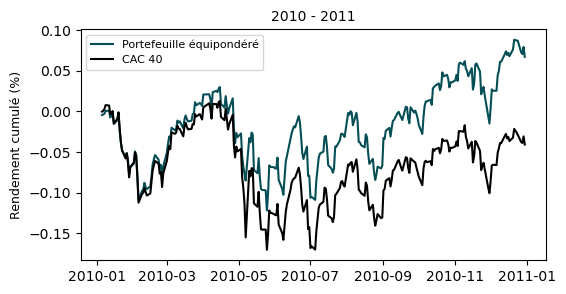

[*****                 10%%                      ]  2 of 20 completed

Performance du Portefeuille de 2010 à 2011 : 6.70%
Performance du Benchmark (CAC 40) de 2010 à 2011 : -4.07%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2010 à 2011 : 0.38
Sharpe Ratio du Benchmark (CAC 40) de 2010 à 2011 : -0.08



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


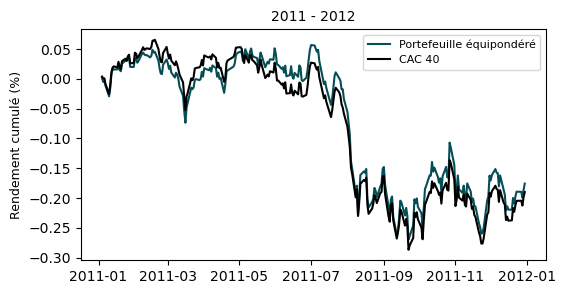

[**********            20%%                      ]  4 of 20 completed

Performance du Portefeuille de 2011 à 2012 : -17.58%
Performance du Benchmark (CAC 40) de 2011 à 2012 : -19.00%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2011 à 2012 : -0.49
Sharpe Ratio du Benchmark (CAC 40) de 2011 à 2012 : -0.60



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


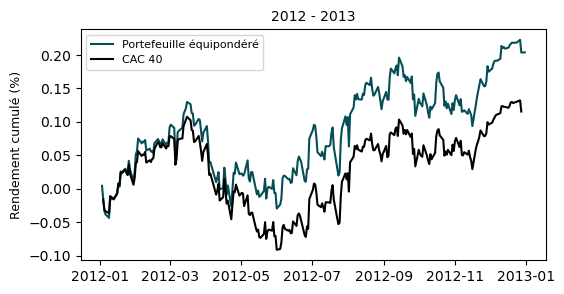

[                       0%%                      ]

Performance du Portefeuille de 2012 à 2013 : 20.39%
Performance du Benchmark (CAC 40) de 2012 à 2013 : 11.55%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2012 à 2013 : 0.91
Sharpe Ratio du Benchmark (CAC 40) de 2012 à 2013 : 0.61



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


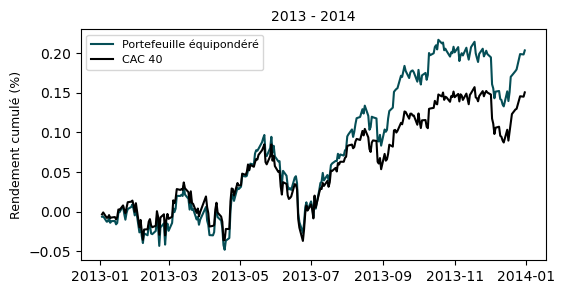

[*****                 10%%                      ]  2 of 20 completed

Performance du Portefeuille de 2013 à 2014 : 20.35%
Performance du Benchmark (CAC 40) de 2013 à 2014 : 15.05%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2013 à 2014 : 1.16
Sharpe Ratio du Benchmark (CAC 40) de 2013 à 2014 : 0.92



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


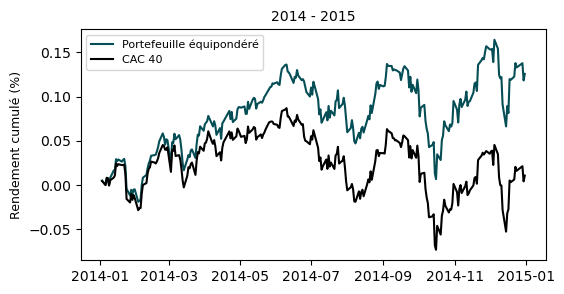

[*****                 10%%                      ]  2 of 20 completed

Performance du Portefeuille de 2014 à 2015 : 12.58%
Performance du Benchmark (CAC 40) de 2014 à 2015 : 1.08%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2014 à 2015 : 0.79
Sharpe Ratio du Benchmark (CAC 40) de 2014 à 2015 : 0.12



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


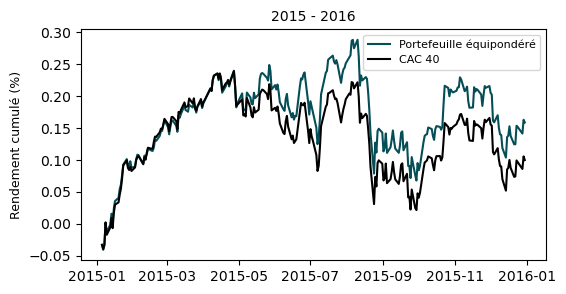

[*****                 10%%                      ]  2 of 20 completed

Performance du Portefeuille de 2015 à 2016 : 15.88%
Performance du Benchmark (CAC 40) de 2015 à 2016 : 9.99%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2015 à 2016 : 0.74
Sharpe Ratio du Benchmark (CAC 40) de 2015 à 2016 : 0.51



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


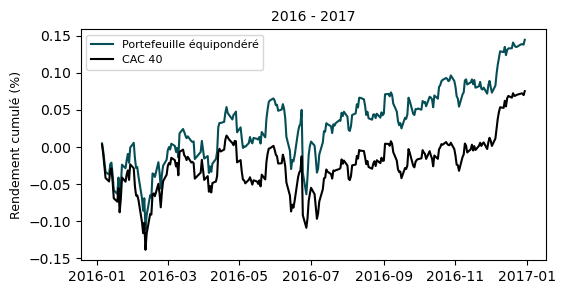

Performance du Portefeuille de 2016 à 2017 : 14.44%
Performance du Benchmark (CAC 40) de 2016 à 2017 : 7.51%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2016 à 2017 : 0.72
Sharpe Ratio du Benchmark (CAC 40) de 2016 à 2017 : 0.43



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


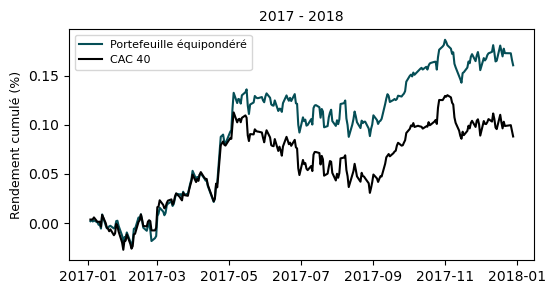

[                       0%%                      ]

Performance du Portefeuille de 2017 à 2018 : 16.07%
Performance du Benchmark (CAC 40) de 2017 à 2018 : 8.81%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2017 à 2018 : 1.39
Sharpe Ratio du Benchmark (CAC 40) de 2017 à 2018 : 0.80



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


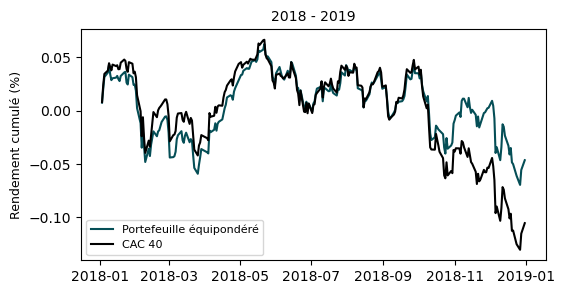

[                       0%%                      ]

Performance du Portefeuille de 2018 à 2019 : -4.65%
Performance du Benchmark (CAC 40) de 2018 à 2019 : -10.55%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2018 à 2019 : -0.35
Sharpe Ratio du Benchmark (CAC 40) de 2018 à 2019 : -0.77



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


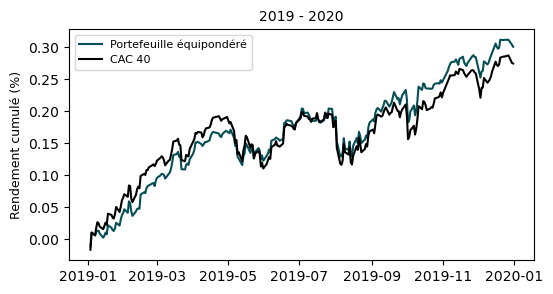

Performance du Portefeuille de 2019 à 2020 : 30.11%
Performance du Benchmark (CAC 40) de 2019 à 2020 : 27.48%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2019 à 2020 : 2.18
Sharpe Ratio du Benchmark (CAC 40) de 2019 à 2020 : 1.85



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


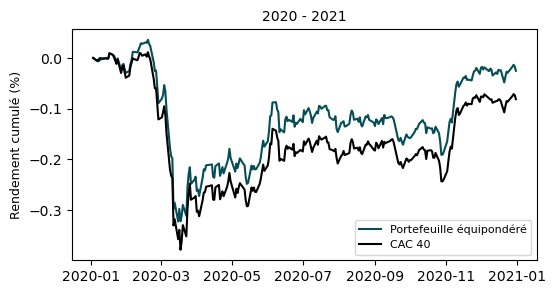

[                       0%%                      ]

Performance du Portefeuille de 2020 à 2021 : -2.52%
Performance du Benchmark (CAC 40) de 2020 à 2021 : -8.11%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2020 à 2021 : 0.06
Sharpe Ratio du Benchmark (CAC 40) de 2020 à 2021 : -0.11



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


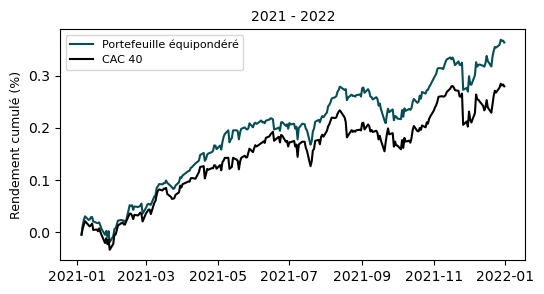

[*******               15%%                      ]  3 of 20 completed

Performance du Portefeuille de 2021 à 2022 : 36.40%
Performance du Benchmark (CAC 40) de 2021 à 2022 : 27.98%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2021 à 2022 : 2.48
Sharpe Ratio du Benchmark (CAC 40) de 2021 à 2022 : 1.77



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


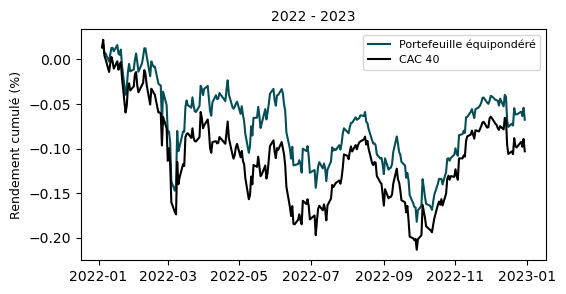

[************          25%%                      ]  5 of 20 completed

Performance du Portefeuille de 2022 à 2023 : -6.76%
Performance du Benchmark (CAC 40) de 2022 à 2023 : -10.30%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2022 à 2023 : -0.26
Sharpe Ratio du Benchmark (CAC 40) de 2022 à 2023 : -0.39



[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


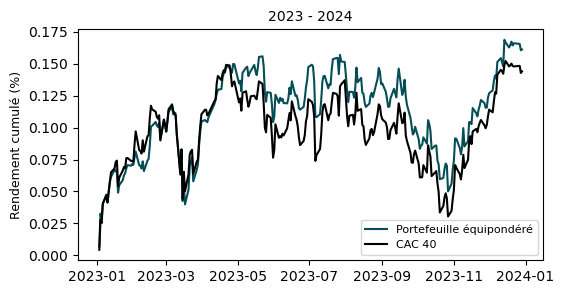

Performance du Portefeuille de 2023 à 2024 : 16.09%
Performance du Benchmark (CAC 40) de 2023 à 2024 : 14.38%

Results have been exported to portfolio_vs_benchmark_analysis_C.xlsx
Sharpe Ratio du Portefeuille de 2023 à 2024 : 1.21
Sharpe Ratio du Benchmark (CAC 40) de 2023 à 2024 : 1.00



In [63]:
# Boucle pour visualiser les performances du portefeuille vs benchmark (CAC 40) pour chaque année
for start_year in range(2010, 2024):
    end_year = start_year + 1
    
    # Étape 1: Télécharger les données historiques pour le portefeuille et le CAC 40 pour une période d'un an
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-01-01"
    
    portfolio_data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Adj Close']
    benchmark_data = yf.download("^FCHI", start=start_date, end=end_date, interval="1d")['Adj Close']
    
    # Étape 2: Calculer les rendements journaliers pour chaque action du portefeuille
    portfolio_returns = portfolio_data.pct_change()
    
    # Étape 3: Calculer le rendement pondéré du portefeuille
    portfolio_weighted_return = portfolio_returns.dot(weights)
    
    # Étape 4: Calculer les rendements journaliers du benchmark (CAC 40)
    benchmark_returns = benchmark_data.pct_change()
    
    # Étape 5: Calculer les rendements cumulés pour le portefeuille et le benchmark
    portfolio_cumulative_return = (1 + portfolio_weighted_return).cumprod() - 1
    benchmark_cumulative_return = (1 + benchmark_returns).cumprod() - 1
    
    # Étape 6: Tracer les rendements cumulés pour comparaison
    plt.figure(figsize=(6, 3))
    plt.plot(portfolio_cumulative_return, label="Portefeuille équipondéré", color="#054E56")
    plt.plot(benchmark_cumulative_return, label="CAC 40", color="black")
    plt.title(f"{start_year} - {end_year}", fontsize=10)
    plt.xlabel("", fontsize=6)
    plt.ylabel("Rendement cumulé (%)", fontsize=9)
    plt.legend(fontsize=8)
    plt.grid(False)
    plt.show()
    
    # Étape 7: Calculer et afficher la performance finale en pourcentage pour le portefeuille et le benchmark
    portfolio_performance_percent = portfolio_cumulative_return.iloc[-1] * 100
    benchmark_performance_percent = benchmark_cumulative_return.iloc[-1] * 100
    print(f"Performance du Portefeuille de {start_year} à {end_year} : {portfolio_performance_percent:.2f}%")
    print(f"Performance du Benchmark (CAC 40) de {start_year} à {end_year} : {benchmark_performance_percent:.2f}%\n")

    # Étape 8: Calculer la volatilité annuelle du portefeuille
    portfolio_volatility = portfolio_weighted_return.std() * np.sqrt(252)
    
    # Étape 9: Calculer la volatilité annuelle du benchmark
    benchmark_volatility = benchmark_returns.std() * np.sqrt(252)

    # Étape 10: Calculer le rendement annuel moyen du portefeuille
    portfolio_annual_return = portfolio_weighted_return.mean() * 252

    # Étape 11: Calculer le rendement annuel moyen du benchmark
    benchmark_annual_return = benchmark_returns.mean() * 252

    # Étape 12: Calculer le Ratio de Sharpe pour le portefeuille
    excess_portfolio_returns = portfolio_weighted_return - risk_free_rate
    sharpe_ratio_portfolio = (excess_portfolio_returns.mean() * 252) / portfolio_volatility

    # Étape 13: Calculer le Ratio de Sharpe pour le Benchmark (CAC 40)
    excess_benchmark_returns = benchmark_returns - risk_free_rate
    sharpe_ratio_benchmark = (excess_benchmark_returns.mean() * 252) / benchmark_volatility

    # Store the results for export
    results_for_export['Year'].append(start_year)
    results_for_export['Portfolio Cumulative Return (%)'].append(portfolio_performance_percent)
    results_for_export['Benchmark Cumulative Return (%)'].append(benchmark_performance_percent)
    results_for_export['Portfolio Annual Return (%)'].append(portfolio_annual_return)
    results_for_export['Benchmark Annual Return (%)'].append(benchmark_annual_return)
    results_for_export['Portfolio Volatility (%)'].append(portfolio_volatility * 100)
    results_for_export['Benchmark Volatility (%)'].append(benchmark_volatility * 100)
    results_for_export['Sharpe Ratio Portfolio'].append(sharpe_ratio_portfolio)
    results_for_export['Sharpe Ratio Benchmark'].append(sharpe_ratio_benchmark)

    results_df = pd.DataFrame(results_for_export)
    file_path = 'portfolio_vs_benchmark_analysis_C.xlsx'
    results_df.to_excel(file_path, index=True)

    print(f"Results have been exported to {file_path}")
    # Affichage des résultats
    print(f"Sharpe Ratio du Portefeuille de {start_year} à {end_year} : {sharpe_ratio_portfolio:.2f}")
    print(f"Sharpe Ratio du Benchmark (CAC 40) de {start_year} à {end_year} : {sharpe_ratio_benchmark:.2f}\n")